# Machine Learning - Assignment 2
# Section A: Data Exploration & Visualization

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style for better visualizations
import seaborn as sns
sns.set_theme()  # applies seaborn’s default style to matplotlibsns.set_palette('husl')

In [19]:
# Load the dataset
df = pd.read_csv("../data/Spotify_Youtube.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (20718, 28)

First few rows:


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
# Drop unused columns
cols_to_drop = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(columns=cols_to_drop, inplace=True)

# Combine 'compilation' into 'album'
df['Album_type'] = df['Album_type'].replace({'compilation': 'album'})

# Basic statistics summary
print("Basic Statistics:")
display(df.describe())

Basic Statistics:


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## Distribution Analysis

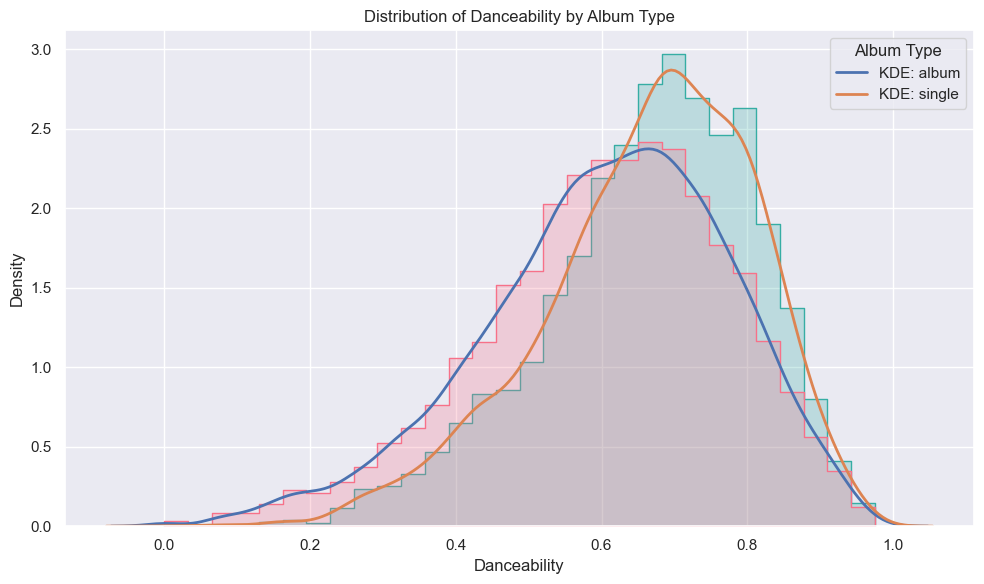

In [7]:
# Histogram of Danceability
plt.figure(figsize=(10, 6))

# שלב 1: היסטוגרמות
sns.histplot(data=df, x='Danceability', hue='Album_type', bins=30,
             element='step', stat='density', common_norm=False, palette='husl')

# שלב 2: עקומות KDE עבור כל Album_type
album_types = df['Album_type'].unique()
for album in album_types:
    subset = df[df['Album_type'] == album]
    sns.kdeplot(data=subset, x='Danceability', label=f"KDE: {album}", lw=2)

# תוספות
plt.title("Distribution of Danceability by Album Type")
plt.xlabel("Danceability")
plt.ylabel("Density")
plt.legend(title='Album Type')
plt.tight_layout()
plt.show()

Singles have overall higher danceability compared to album tracks

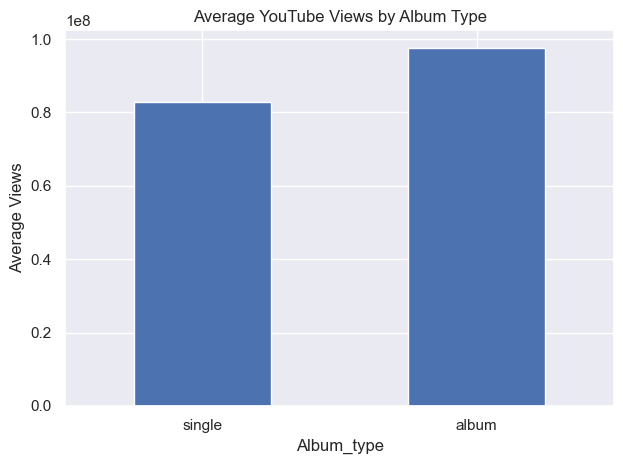

In [6]:
# Bar Plot: Average Views by Album Type
avg_views = df.groupby('Album_type')['Views'].mean().sort_values()
avg_views.plot(kind='bar', title='Average YouTube Views by Album Type')
plt.ylabel("Average Views")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

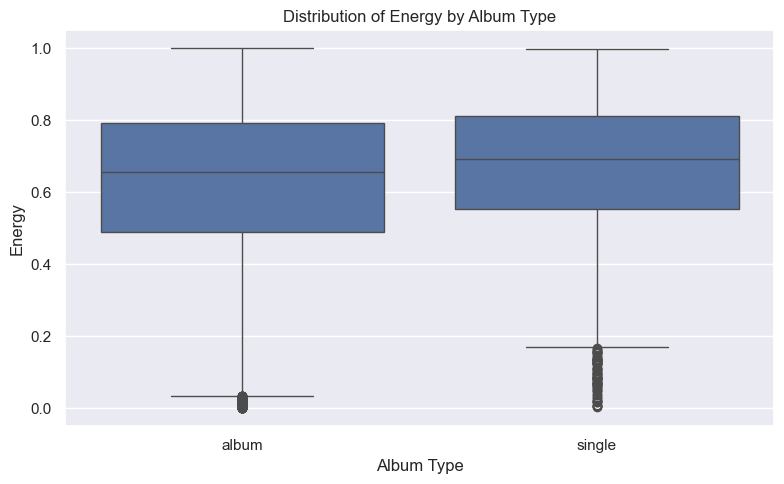

In [8]:
# Box Plot: Energy by Album Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Album_type', y='Energy', data=df)
plt.title("Distribution of Energy by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

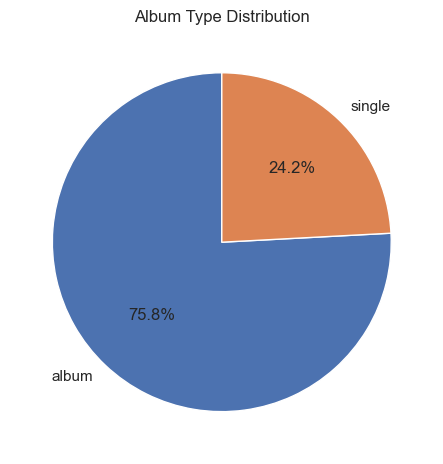

In [9]:
# Pie Chart: Distribution of Album Types
album_counts = df['Album_type'].value_counts()
album_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Album Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

<Axes: xlabel='Album_type', ylabel='Energy'>

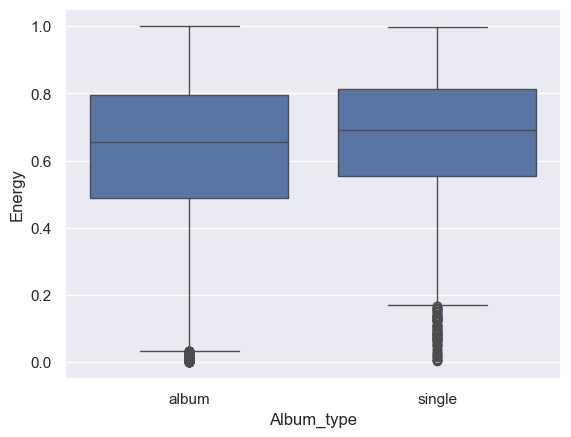

In [12]:
sns.boxplot(data=df, x='Album_type', y='Energy')

Singles tend to have higher energy on average, with a narrower interquartile range.

<Axes: xlabel='Danceability', ylabel='Valence'>

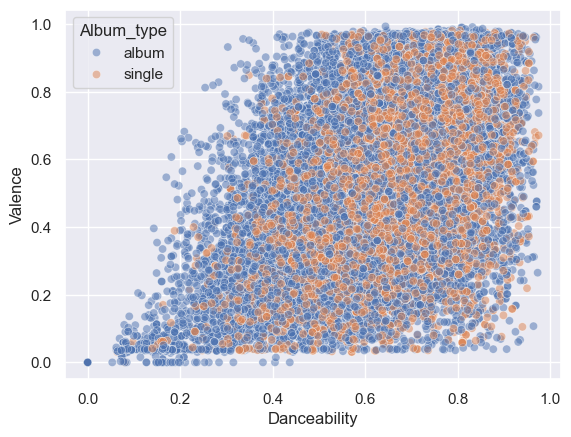

In [13]:
sns.scatterplot(data=df, x='Danceability', y='Valence', hue='Album_type', alpha=0.5)

Songs with high danceability also tend to have higher valence (i.e., more positive mood), especially among singles.

In [16]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


                  Unnamed: 0  Danceability  Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  Tempo  Duration_ms  Views  Likes  Comments  Stream  Key_Code  Tempo_Code
Unnamed: 0              1.00          0.18    0.05      0.18         0.10         -0.05             -0.07     -0.03    -0.06   0.05        -0.13   0.03   0.09      0.05    0.07      0.02        0.04
Danceability            0.18          1.00    0.24      0.35         0.21         -0.28             -0.32     -0.08     0.47  -0.07        -0.09   0.09   0.10      0.04    0.07      0.04        0.00
Energy                  0.05          0.24    1.00      0.74         0.07         -0.66             -0.31      0.17     0.39   0.16         0.02   0.07   0.06      0.04    0.04      0.03        0.16
Loudness                0.18          0.35    0.74      1.00         0.03         -0.55             -0.55      0.09     0.31   0.14         0.01   0.12   0.12      0.06    0.12      0.03        0.15
Speec

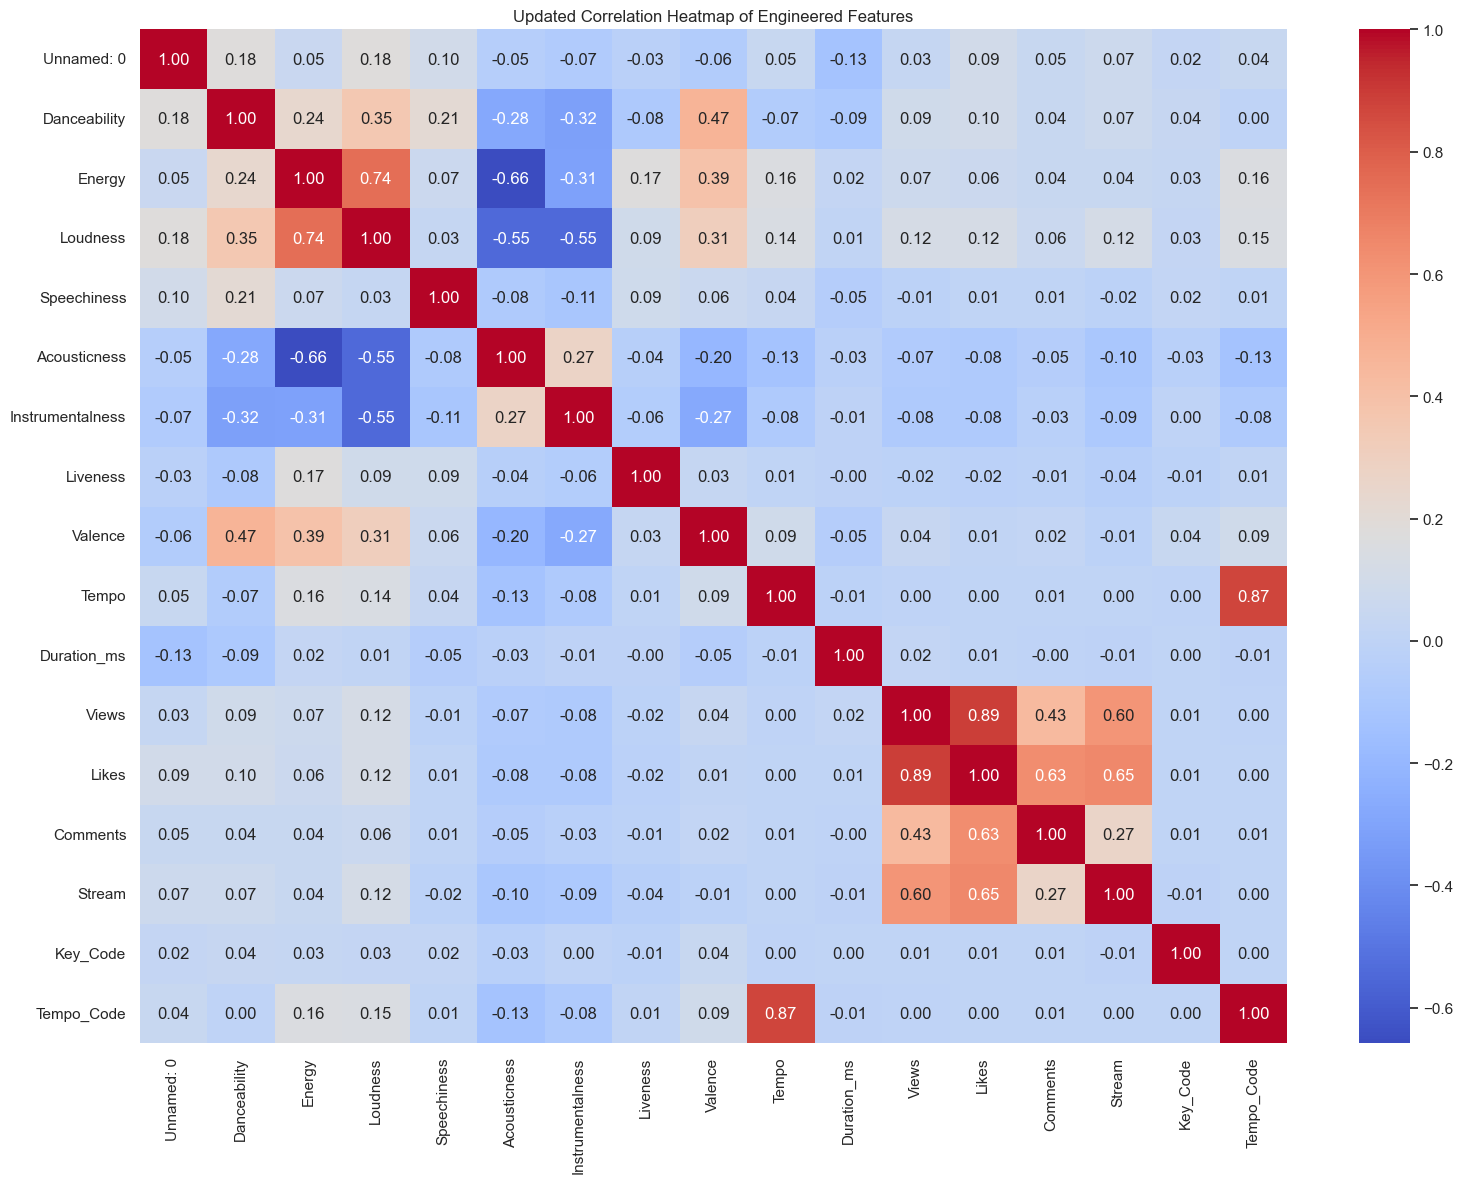

In [25]:
# צור Tempo_Bin אם היא לא קיימת
if 'Tempo_Bin' not in df.columns:
    bins = [0, 90, 130, np.inf]
    labels = ['Slow', 'Medium', 'Fast']
    df['Tempo_Bin'] = pd.cut(df['Tempo'], bins=bins, labels=labels)

# 1. Key – לוודא שהוא קטגוריה
df['Key'] = df['Key'].astype('category')

# נניח שיש ערך -1 עבור לא מזוהה: נטפל בו
df['Key'] = df['Key'].replace(-1, np.nan)

# נמיר לקוד מספרי
df['Key_Code'] = df['Key'].cat.codes

# 2. Tempo_Bin
df['Tempo_Bin'] = df['Tempo_Bin'].astype('category')
df['Tempo_Code'] = df['Tempo_Bin'].cat.codes

# בחר רק עמודות מספריות
numeric_df = df.select_dtypes(include=np.number)

# רק עמודות מספריות, כולל קידודים חדשים
numeric_df = df.select_dtypes(include=np.number)

# הסר עמודות לא רלוונטיות כמו Target אם אתה לא רוצה לראות אותה
correlation_matrix = numeric_df.drop(columns=['Target'], errors='ignore').corr()
print(correlation_matrix.round(2).to_string())


# ציור Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Updated Correlation Heatmap of Engineered Features")
plt.tight_layout()
plt.show()

### 📊 Correlation Analysis – Numerical Features

To gain better understanding of feature relationships, we generated a correlation heatmap.

#### Key Observations:
- **Very strong correlation** between `Views` and `Likes` (0.89), suggesting highly viewed songs tend to get more likes.
- `Danceability` and `Valence` are moderately correlated (0.47), indicating upbeat songs tend to be more danceable.
- `Energy` shows strong positive correlation with `Loudness` (0.74), and strong negative correlation with `Acousticness` (-0.66).
- Popularity features like `Views`, `Likes`, `Comments`, and `Stream` are moderately to highly correlated (0.60–0.65), implying potential feature redundancy.

These insights will help guide our feature selection and preprocessing strategy in later sections.

In [11]:
# Save processed dataset for later steps
df.to_csv("../output/Processed_Spotify_Youtube.csv", index=False)